# MNIST using Neural Networks

Run the statement to import the TensorFlow library:

In [109]:
import tensorflow as tf
import matplotlib.pyplot as plt


Run the statement to load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and to convert the samples from integers to floating-point numbers:

In [110]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Build the model with a single layer and relu activation function:

In [111]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

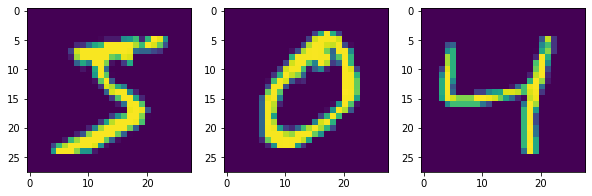

In [112]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i in range(3):
  ax[i].imshow(x_train[i].reshape(28,28))
plt.show()


In [113]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (5,5), strides=1, padding='same', activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (5,5), strides=1, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

In [114]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)        

Choosing our loss function, in this case crossentropy:

In [115]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [116]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Adjusting the model parameters to minimize the loss of our model: 

In [117]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1161 - accuracy: 0.9643
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0395 - accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0314 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0264 - accuracy: 0.9919
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

Checking the model's performance on the Validation-set.

In [118]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0310 - accuracy: 0.9923


[0.031018996611237526, 0.9922999739646912]

Try to improve the accuracy to 97% by changing the number of layers and/or adding convolutions.